# Part B
## Build the network of Country Performers

#### Use a regular expression to extract all outgoing links from each of the pages you downloaded above.

- Start by making a single page work. Do some debugging to make sure it's actually working.
- Then slowly build the loops over performers/pages to take your little operation to industrial scale
- You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.


In [1]:
import os
import re

folder_path = 'performer_files'

# Regular expression pattern to match wiki links
pattern = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        links = re.findall(pattern, text)
        unique_links = set(links)

        print(f"Outgoing links in {filename}:")
        for link in unique_links:
            print(link)
        print('-' * 40)



Outgoing links in Harry_McClintock.txt:
Al Pearce
Category:20th-century guitarists
The West (miniseries)
Coen brothers
KFRC (defunct)
Spin-off (media)
Joe Hill (activist)
Category:American country singer-songwriters
union organizer
Billboard (magazine)
Robert Crumb
Category:American male guitarists
Bea Benaderet
YouTube
Frank Little (unionist)
Uhrichsville, Ohio
O Brother, Where Art Thou? (soundtrack)
busker
Category:1957 deaths
Category:American country guitarists
Category:American male composers
Category:Country musicians from Tennessee
Meredith Willson
Category:1882 births
author
Hallelujah, I'm a Bum
Blue Monday Jamboree
The Preacher and the Slave
San Francisco
I Love Lucy
Category:Industrial Workers of the World members
Category:Guitarists from Tennessee
The Big Rock Candy Mountains
Category:20th-century American singer-songwriters
Industrial Workers of the World
poet
O Brother, Where Art Thou?
The Old Chisholm Trail
cowboy
Smithsonian Folkways
Farmington, Utah
Category:Musicians 

#### For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.


In [2]:
folder_path = 'performer_files'
link_pattern = r'\[\[([^\]|#]+)(?:\|[^\]]+)?\]\]'  # Pattern to match wiki links
performer_pattern = r'\[\[([^\]|]+)(?:\|([^\]]+))?\]\]'  # Pattern to extract performer names

# Load performer names from 'performers.txt' into a set for quick lookup
with open('performers.txt', 'r', encoding='utf-8') as file:
    performers = re.findall(performer_pattern, file.read())
    performer_set = {p[0] for p in performers}

# Create a dictionary to store the performer links for each file
all_performer_links = {}

# Process each file in the folder and save matching performer links
for filename in filter(lambda f: f.endswith('.txt'), os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        links = re.findall(link_pattern, file.read())
        performer_links = set(link for link in links if link in performer_set)
    
    # Store the performer links for this file
    all_performer_links[filename] = performer_links
    
    print(f"Outgoing performer links in {filename}:")
    if performer_links:
        print("\n".join(performer_links))
    else:
        print("No performer links found.")
    print('-' * 40)



Outgoing performer links in Harry_McClintock.txt:
No performer links found.
----------------------------------------
Outgoing performer links in Haley_&_Michaels.txt:
Lonestar
Richie McDonald
----------------------------------------
Outgoing performer links in Dickey_Betts.txt:
Frank Hannon
Gregg Allman
Vassar Clements
----------------------------------------
Outgoing performer links in Two_Tons_of_Steel.txt:
Dwight Yoakam
----------------------------------------
Outgoing performer links in Bacon_Brothers.txt:
No performer links found.
----------------------------------------
Outgoing performer links in Cledus_T._Judd.txt:
Mindy McCready
Brooks & Dunn
Montgomery Gentry
Morgan Wallen
John Michael Montgomery
Alan Jackson
Wynonna Judd
Brad Paisley
Naomi Judd
Tracy Lawrence
Colt Ford
Shania Twain
Garth Brooks
Lisa Marie Presley
Julie Reeves
Deborah Allen
Eagles (band)
Ronnie Dunn
Joe Diffie
Heidi Newfield
Little Big Town
Kellie Pickler
Kenny Chesney
Florida Georgia Line
Tim Wilson (comedia

#### Use a NetworkX DiGraph to store the network.

In [3]:
import networkx as nx

# Create a directed graph to store the performer network
G = nx.DiGraph()

# Add each performer as a node in the graph (performer names only)
G.add_nodes_from(performer_set)

# Add edges between performers based on links in files
for filename, performer_links in all_performer_links.items():
    # Extract performer name from filename (replace underscore with space)
    performer_name = filename.replace('_', ' ').replace('.txt', '')
    
    # If this performer exists in the performer_set, proceed
    if performer_name in performer_set:
        # Add edges from this performer to the linked performers
        for linked_performer in performer_links:
            if linked_performer in performer_set:  # Ensure the linked performer is valid
                G.add_edge(performer_name, linked_performer)

# Print basic graph information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



Number of nodes: 2091
Number of edges: 17585


In [4]:

# Function to count words in a given text
def count_words(text):
    # Use regex to match words (ignoring symbols and punctuation)
    words = re.findall(r'\b\w+\b', text)
    return len(words)

# Process each file to get the content length and store it as a node attribute for the performer
for filename in filter(lambda f: f.endswith('.txt'), os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
        # Count the number of words in the file
        word_count = count_words(text)
        
        # Assuming the filename contains the performer's name, you can match it to the performers
        for performer in performer_set:
            if performer.replace(" ", "_") in filename:  # Match performer with filename
                # Store the word count as a node attribute for the performer
                G.nodes[performer]['word_count'] = word_count

# Optionally, print the word count for each performer node
for node, data in G.nodes(data=True):
    if 'word_count' in data:
        print(f"{node}: {data['word_count']}")

Bryan Austin: 951
Gene Autry: 12995
Reba McEntire: 21253
Lee Brice: 3189
Leland Martin: 449
Lorenzo Antonio: 2994
Sasha Pieterse: 6514
The Peasall Sisters: 840
Ray Benson: 1266
Pokey LaFarge: 2873
Wylie Gustafson: 2041
Johnny Gimble: 3575
John Prine: 11174
Sean Hogan: 1129
Valerie June: 4421
Aubrey Haynie: 775
Thomas Rhett: 8279
Railroad Earth: 2648
Nikki Hornsby: 1340
Ricky Nelson: 7555
Darryl Worley: 1598
Morgan Wade (singer): 2745
Jacob Lyda: 670
Warner Mack: 1029
Sonya Isaacs: 1321
Frankie Laine: 12928
Henson Cargill: 1497
Jenny Lou Carson: 1326
Wesley Dennis (singer): 764
Monty Byrom: 1968
Rhett Akins: 2846
Keith Gattis: 1035
Con Hunley: 1304
Rebel Meets Rebel: 864
Sonia Leigh: 808
Jeffrey Foucault: 696
Noel Haggard: 672
Gary Morris: 1824
Daisy Mallory: 792
Scott Joss: 739
Jon Pardi: 3954
John Driskell Hopkins: 1523
Anita Cochran: 1439
Perfect Stranger (band): 1546
Mike McClure: 833
Ian Tyson: 4614
Ashley Cooke: 942
DeFord Bailey: 3616
Rachel Proctor: 1088
O. B. McClinton: 1217
Pa

#### When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then discard those disconnected nodes from the network.

In [5]:
# Check for disconnected nodes (nodes with 0 in-degree and 0 out-degree)
disconnected_nodes = [node for node in G.nodes() if G.degree(node) == 0]

# Optionally, print disconnected nodes to check for any mistakes
if disconnected_nodes:
    print("Disconnected nodes (no in- or out-degrees):")
    print(disconnected_nodes)

# Remove disconnected nodes from the graph
G.remove_nodes_from(disconnected_nodes)

# Optionally, print basic graph info after removing disconnected nodes
print(f"Remaining nodes: {G.number_of_nodes()}")
print(f"Remaining edges: {G.number_of_edges()}")


Disconnected nodes (no in- or out-degrees):
['Sasha Pieterse', 'Wylie Gustafson', 'Warner Mack', 'Sundy Best', 'Griffin Layne', 'The Band of Heathens', 'Cee Cee Chapman', 'James & Michael Younger', 'Ray Condo', 'Girls Next Door (band)', 'Brent Parlane', 'Star De Azlan', 'Robert Gordon (musician)', 'Jim Nesbitt', 'Tim Ryan (country musician)', 'Jolie & The Wanted', 'Mundo Earwood', 'Scott McQuaig', 'Mason Dixon (band)', 'Wyatt (band)', 'Justin McBride', 'Dick Feller', 'Cole Deggs & The Lonesome', 'Keith Perry (musician)', 'Ashley Robertson (singer)', 'Karen Lee Batten', 'Rednex', 'Gear Daddies', 'Luke Bell (musician)', 'The Shoppe', 'Blake Reid', 'The Abrams Brothers', 'My Darling Clementine (band)', 'Elisa Lindström', 'Donovan Chapman', 'Chuck Wagon & the Wheels', 'Joni Harms', 'The Southern Gothic', 'Mike Ryan (musician)', 'P!nk', 'Rune Rudberg', 'The White Buffalo (band)', 'Folk Soul Revival', 'Luke Stricklin', 'The Spurs', 'Harry McClintock', 'Cleve Francis', 'Mark Cooke', 'Gay Kayl

#### Finally, extract the largest component - it will make our work with visualisations much easier (note: removing isolated nodes (with no links) does not guarantee that you are left with the largest component).

In [7]:
import pickle
import os

folder_path = "/Users/aya/Desktop/Skole/social_graps/Aya/shared"
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, 'performer_network.pkl')


# Find all weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# Extract the largest component (component with the most nodes)
largest_component = max(weakly_connected_components, key=len)

# Create a subgraph of the largest component
G_largest = G.subgraph(largest_component).copy()

# Save the graph to the file in the specified folder
with open(file_path, 'wb') as f:
    pickle.dump(G_largest, f)

# Optionally, print basic info about the largest component
print(f"Number of nodes in the largest component: {G_largest.number_of_nodes()}")
print(f"Number of edges in the largest component: {G_largest.number_of_edges()}")


Number of nodes in the largest component: 1939
Number of edges in the largest component: 17578


#### Plot the in and out-degree distributions for the entire network

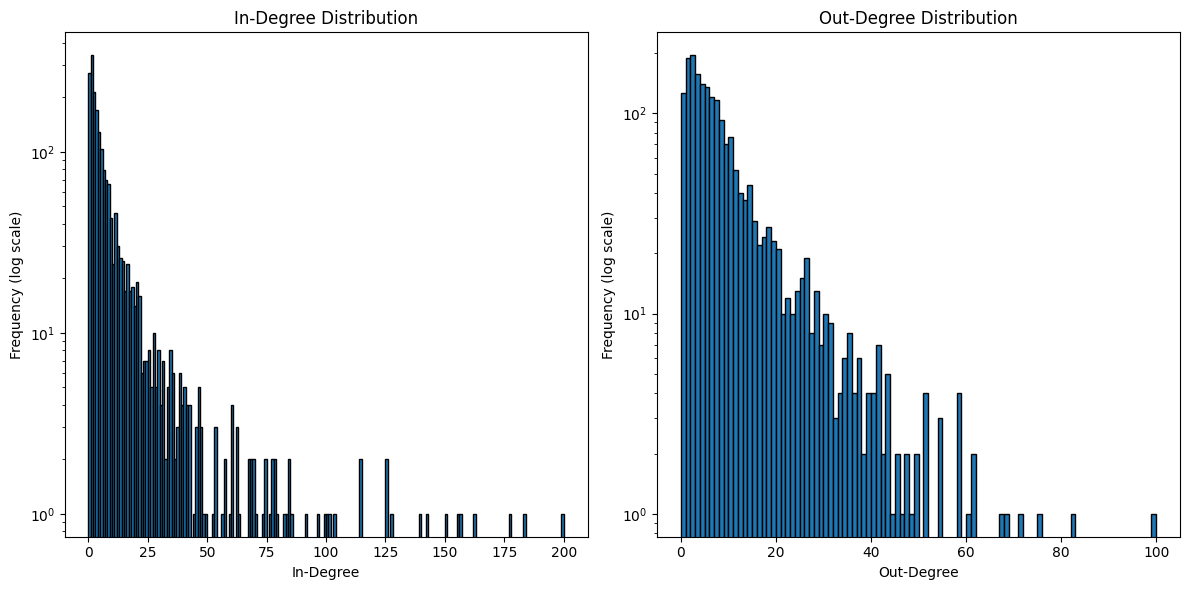

In [36]:
import matplotlib.pyplot as plt
# Get the in-degrees and out-degrees of all nodes in the graph
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# Plot the in-degree distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot for in-degrees
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), edgecolor='black', log=True)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency (log scale)')

# Plot the out-degree distribution
plt.subplot(1, 2, 2)  # Second subplot for out-degrees
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), edgecolor='black', log=True)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency (log scale)')

# Show the plots
plt.tight_layout()
plt.show()


#### Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)?

In [37]:
# Calculate in-degrees and out-degrees for all nodes
in_degrees = dict(G.in_degree())  # Dictionary of node: in-degree
out_degrees = dict(G.out_degree())  # Dictionary of node: out-degree

# Sort performers by in-degree (descending order) and get the top 5
top_5_in_degree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

# Sort performers by out-degree (descending order) and get the top 5
top_5_out_degree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the results
print("Top 5 Performers by In-Degree (most referenced):")
for performer, degree in top_5_in_degree:
    print(f"{performer}: {degree} in-degree")

print("\nTop 5 Performers by Out-Degree (most referencing):")
for performer, degree in top_5_out_degree:
    print(f"{performer}: {degree} out-degree")


Top 5 Performers by In-Degree (most referenced):
Willie Nelson: 200 in-degree
Johnny Cash: 183 in-degree
Elvis Presley: 177 in-degree
Dolly Parton: 162 in-degree
George Jones: 156 in-degree

Top 5 Performers by Out-Degree (most referencing):
Hillary Lindsey: 100 out-degree
Pam Tillis: 82 out-degree
Randy Travis: 75 out-degree
Vince Gill: 71 out-degree
Patty Loveless: 68 out-degree


#### What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [38]:
# Get the word count attribute for each node (performer)
word_counts = {node: data.get('word_count', 0) for node, data in G.nodes(data=True)}

# Sort the nodes by word count (length of content) in descending order
top_10_longest_entries = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 performers/pages with the longest wiki entries
print("Top 10 Pages with the Longest Wiki Entries:")
for performer, word_count in top_10_longest_entries:
    print(f"{performer}: {word_count} words")


Top 10 Pages with the Longest Wiki Entries:
Beyoncé: 62856 words
Taylor Swift: 56351 words
Miley Cyrus: 51262 words
Justin Bieber: 50693 words
Carrie Underwood: 45245 words
Justin Timberlake: 44775 words
Demi Lovato: 44189 words
Bob Dylan: 41087 words
Ed Sheeran: 36322 words
Elvis Presley: 33740 words


# Part 3

#### For the sake of the visualisation, let's convert our network to undirected graph, we'll also use `nx.draw_kamada_kawai` to draw the resulting undirected network. Set the plot so that node-size depends on the node degree and make the node color depend on the length of content attribute.

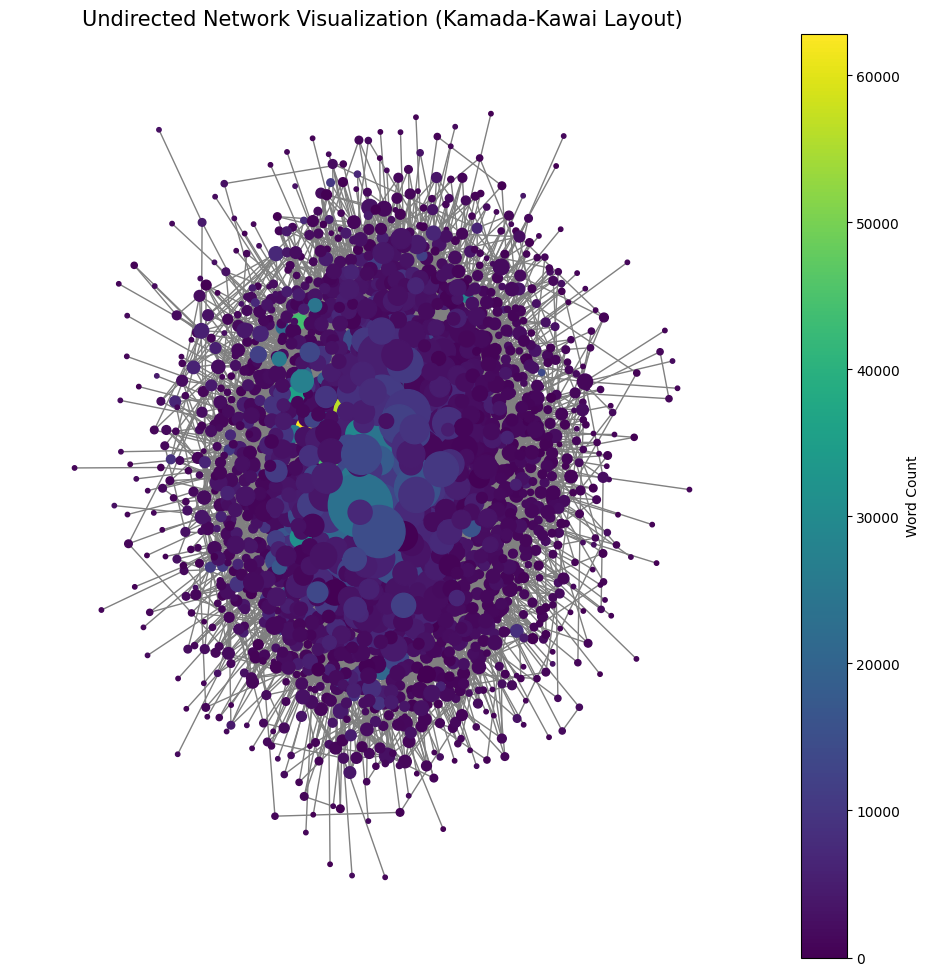

In [46]:
import matplotlib.pyplot as plt

G_und = G_largest.to_undirected()
node_sizes = [G_und.degree(n) * 10 for n in G_und.nodes()]  
node_colors = [G_und.nodes[n].get('word_count', 0) for n in G_und.nodes()]

cmap = plt.colormaps['viridis']

plt.figure(figsize=(12, 12))
pos = nx.kamada_kawai_layout(G_und) 

nodes = nx.draw_networkx_nodes(
    G_und, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=cmap,
    vmin=min(node_colors),
    vmax=max(node_colors)
)

nx.draw_networkx_edges(G_und, pos, edge_color='gray')

plt.colorbar(nodes, label='Word Count')

plt.title('Undirected Network Visualization (Kamada-Kawai Layout)', fontsize=15)
plt.axis('off') 
plt.show()
